# XY plot from word2vec

## Aims

* Display set of terms links between two concepts
* Make Word2Vec similarities easier to understand
* Explore potentails for further visualisation

## Method

1. Select list of terms 
2. Compare this list's similarities to two core concepts
3. Plot the similarities 


## Questions

* Will the visualisation be human comprehendable
* Will the two terms be on an axis or just similiarities to the term?

In [2]:

from gensim.models import Word2Vec
from gensim.models import word2vec
# from gensim.models import LDA
import gensim
import logging
# import stop_words
import nltk
import string
import os
from nltk.stem import WordNetLemmatizer
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

wordnet_lemmatizer = WordNetLemmatizer()
%matplotlib inline



C:\Users\joemountford\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Shit... that was easy!

In [3]:
# model.save("word2vec.vec")

model = Word2Vec.load("word2vec.vec")

2017-12-23 11:27:25,700 : INFO : loading Word2Vec object from word2vec.vec
2017-12-23 11:27:26,209 : INFO : loading wv recursively from word2vec.vec.wv.* with mmap=None
2017-12-23 11:27:26,211 : INFO : setting ignored attribute syn0norm to None
2017-12-23 11:27:26,215 : INFO : setting ignored attribute cum_table to None
2017-12-23 11:27:26,217 : INFO : loaded word2vec.vec


In [4]:
x_word = "man"
y_word = "woman"

dimensions = [x_word, y_word]

test_words = ["trump", "hillary", "putin", "bernie", "bush", "merkel"]

In [5]:
# based on the most common terms
vocab_full = list(model.wv.vocab)
with open("sentances.sent", "rb") as sent: 
    doc_list = pickle.load(sent)

from collections import Counter
counter = Counter()

for item in doc_list[:1000]: 
    counter.update(item)
print(counter.most_common(20))    
test_words = [x[0] for x in counter.most_common() if x[0] in vocab_full][:20]
print(test_words[:20])


[('will', 454), ('men', 448), ('like', 319), ('woman', 303), ('girl', 278), ('king', 277), ('make', 276), ('time', 223), ('rok', 218), ('life', 210), ('visit', 207), ('must', 201), ('year', 201), ('find', 199), ('great', 199), ('dont', 195), ('thing', 194), ('trump', 177), ('even', 173), ('get', 170)]
['will', 'men', 'like', 'woman', 'girl', 'king', 'make', 'time', 'rok', 'life', 'visit', 'must', 'year', 'find', 'great', 'dont', 'thing', 'trump', 'even', 'get']


In [6]:
# based on the two axis 
# auto_test_words = model.wv.most_similar(positive = dimensions, topn = topnum)

# #based on one term
# topnum = 10
# auto_test_words = model.wv.most_similar(positive = "men", topn = topnum)


# print(auto_test_words)

# test_words = [x[0] for x in auto_test_words]

In [7]:
lemma = WordNetLemmatizer()

values = {}

# term = lemma.lemmatize(term)

for word in test_words: 
    try:
        values[word] = {}
        for dimension in dimensions: 
            similarity = model.wv.similarity(word, dimension)
            values[word][dimension] = similarity
    except: 
        print("{} not in dictionary".format(word))

        
print (values)

{'will': {'man': 0.0031918926567944678, 'woman': 0.13428407546466498}, 'men': {'man': -0.0057642234107963992, 'woman': 0.54808621240825739}, 'like': {'man': 0.073029678627051411, 'woman': 0.13360427373722172}, 'woman': {'man': -0.026109258578760081, 'woman': 0.99999999999999978}, 'girl': {'man': -0.010992340699702723, 'woman': 0.50511900707725632}, 'king': {'man': 0.046228476683798925, 'woman': -0.065771992586095257}, 'make': {'man': 0.068346244563632558, 'woman': 0.13860515883495245}, 'time': {'man': 0.062627590763674273, 'woman': 0.18324892456704955}, 'rok': {'man': 0.085789675346258337, 'woman': 0.076168519279606606}, 'life': {'man': -0.028162242859189203, 'woman': 0.21285547212769593}, 'visit': {'man': 0.22156872559068427, 'woman': -0.04161115319157653}, 'must': {'man': 0.08703672787271903, 'woman': 0.10426432889019985}, 'year': {'man': 0.018247423432902234, 'woman': 0.14744829430309458}, 'find': {'man': 0.06997929909052919, 'woman': 0.31363446929875716}, 'great': {'man': 0.1415414

In [8]:
dimension_points = {}
for dimension in dimensions: 
    dimension_points[dimension] = []
    for word in test_words: 
        try:
            dimension_points[dimension].append(values[word][dimension])
        except: 
            pass
        
print(dimension_points)

{'man': [0.0031918926567944678, -0.0057642234107963992, 0.073029678627051411, -0.026109258578760081, -0.010992340699702723, 0.046228476683798925, 0.068346244563632558, 0.062627590763674273, 0.085789675346258337, -0.028162242859189203, 0.22156872559068427, 0.08703672787271903, 0.018247423432902234, 0.06997929909052919, 0.14154143850572345, 0.14761554877863614, 0.11503458588565972, 0.071857964797735666, 0.0328688865779726, 0.083451710016642727], 'woman': [0.13428407546466498, 0.54808621240825739, 0.13360427373722172, 0.99999999999999978, 0.50511900707725632, -0.065771992586095257, 0.13860515883495245, 0.18324892456704955, 0.076168519279606606, 0.21285547212769593, -0.04161115319157653, 0.10426432889019985, 0.14744829430309458, 0.31363446929875716, 0.09543875273492948, 0.27974968691866092, 0.21967582728585719, 0.015850974382107329, 0.28888783924830141, 0.21377137013721975]}


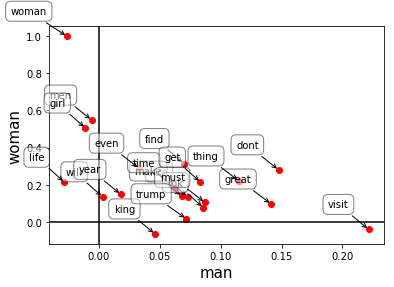

In [9]:
import matplotlib.pyplot as plt
plt.plot(dimension_points[x_word], dimension_points[y_word], 'ro')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel(x_word, fontsize = 15)
plt.ylabel(y_word, fontsize = 15)

for label in test_words:
    try:
        plt.annotate(
            label,
            xy=(values[label][x_word], values[label][y_word]), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    except:
        pass
plt.show()

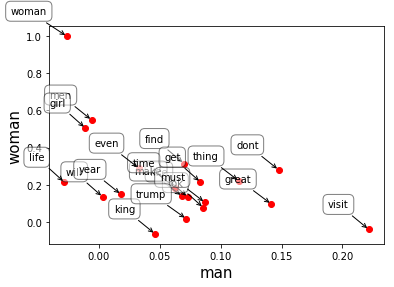

In [10]:
plt.plot(dimension_points[x_word], dimension_points[y_word], 'ro')

# plt.axhline(0, color='black')
# plt.axvline(0, color='black')

plt.xlabel(x_word, fontsize = 15)
plt.ylabel(y_word, fontsize = 15)

for label in test_words:
    try:
        plt.annotate(
            label,
            xy=(values[label][x_word], values[label][y_word]), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    except:
        pass

plt.show()